# Drill: Presenting the same data multiple ways

#### Tasks: <br>
Choose 1 variable and plot that variable 4 different ways <br>
Choose 2 continuous variables, and plot them 3 different ways <br>
Choose 1 continuous variable and 1 categorical variable, and plot them 6 different ways <br>

[source](https://www.kaggle.com/kevinmariogerard/tmdbmovies)

In [264]:
# Import modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [265]:
# Load CSV files.

data = pd.read_csv('./data/tmdb-movies.csv')

In [266]:
# Calculate profit
data['profit'] = data['revenue'] - data['budget']

# Remove films with $0 budget and revenue
data = data[data.revenue != 0]

# Trim down the dataset to films released from 1990 to present.
data = data[data.release_year >= 2000]

In [267]:
dataFilter = data.filter(['profit','original_title', 'genres',
                                   'release_year', 'vote_average'], axis=1)
dataFilter.head()

,profit,original_title,genres,release_year,vote_average
0,1363528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,6.5
1,228436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,7.1
2,185238201,Insurgent,Adventure|Science Fiction|Thriller,2015,6.3
3,1868178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,7.5
4,1316249360,Furious 7,Action|Crime|Thriller,2015,7.3


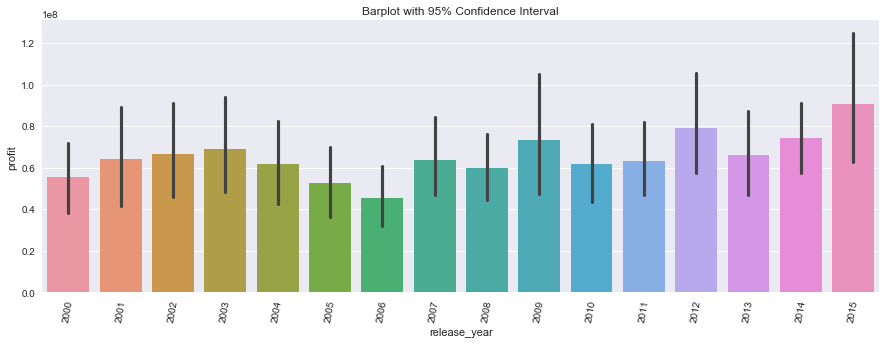

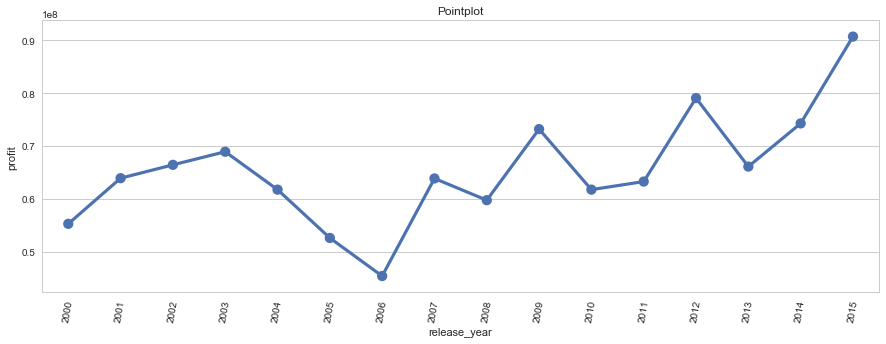

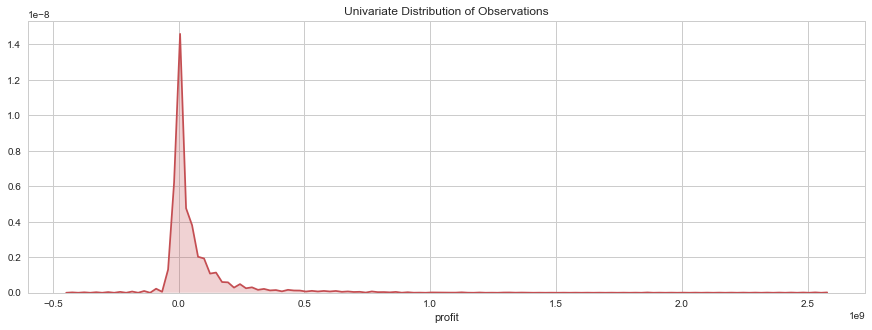

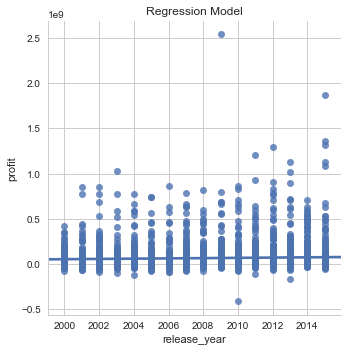

In [268]:
# Let's plot profit per year 4 different ways.

fig, ax = plt.subplots(figsize = plotsize)
sns.set(style='whitegrid', color_codes = True)
sns.barplot(data = dataFilter, x = 'release_year', y = 'profit', ci=95)
plt.title('Barplot with 95% Confidence Interval')
plt.xticks(rotation=80)
plt.show()

fix, ax = plt.subplots(figsize = plotsize)
sns.set(style ='whitegrid', color_codes = True)
sns.pointplot(data = dataFilter, x = 'release_year', y = 'profit', ci=None)
plt.title('Pointplot')
plt.xticks(rotation=80)
plt.show()

fig, ax = plt.subplots(figsize = plotsize)
profit = dataFilter['profit']
sns.distplot(profit, hist=False, color = 'r', kde_kws={"shade": True})
plt.title('Univariate Distribution of Observations')
plt.show()

sns.lmplot(data = dataFilter, x = 'release_year', y = 'profit')
plt.title('Regression Model')
plt.show()

In [269]:
# Taking a closer look at average profit by genre.

genreClass = dataFilter['genres'].str.split('|').apply(pd.Series, 1).stack()
genreClass.index = genreClass.index.droplevel(-1)
genreClass.name = 'genres'
del dataFilter['genres']
movies = dataFilter.join(genreClass)
movies.head()

,profit,original_title,release_year,vote_average,genres
0,1363528810,Jurassic World,2015,6.5,Action
0,1363528810,Jurassic World,2015,6.5,Adventure
0,1363528810,Jurassic World,2015,6.5,Science Fiction
0,1363528810,Jurassic World,2015,6.5,Thriller
1,228436354,Mad Max: Fury Road,2015,7.1,Action


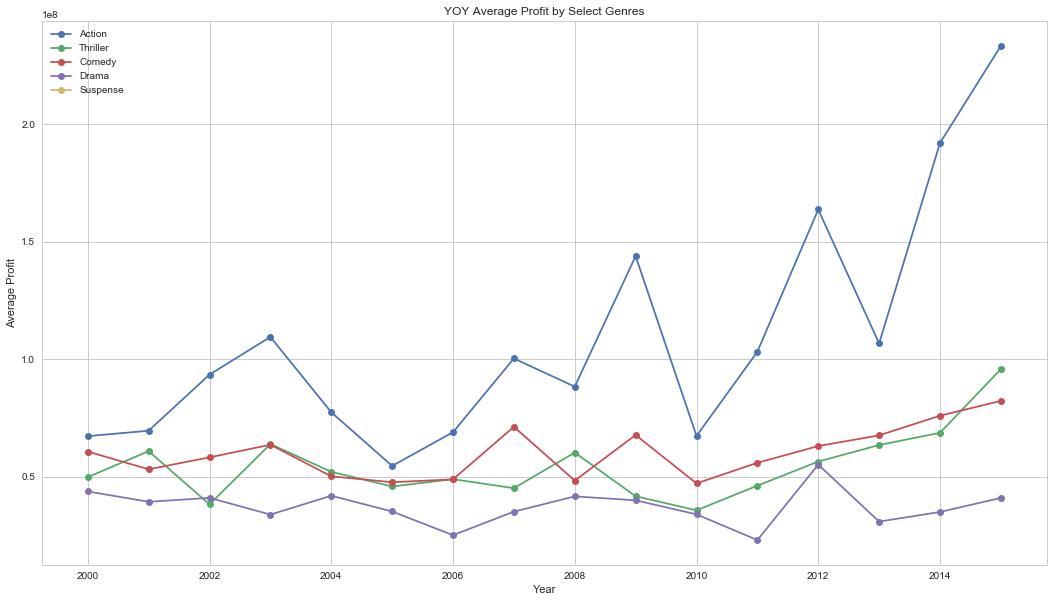

In [270]:
genreDf = movies[['original_title', 'profit', 'release_year', 'genres']]
df1 = genreDf.groupby(['genres', 'release_year'], as_index=False)['profit'].mean()

fig, ax = plt.subplots(figsize = (18, 10))
for genres in ['Action', 'Thriller', 'Comedy', 'Drama', 'Suspense']:
    ax.plot(df1[df1.genres==genres].release_year, df1[df1.genres==genres].profit, label = genres,
           marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Average Profit')
ax.legend(loc='upper left')
plt.title('YOY Average Profit by Select Genres')
plt.show()

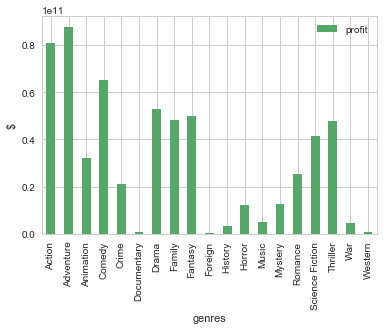

In [271]:
df2 = movies[['genres', 'profit']]
avgProfitGenre_df = df2.groupby(['genres']).sum()
avgProfitGenre_df.plot.bar(color='g')
plt.ylabel('$')
plt.show()

In [272]:
# Let's compare Action & Adventure

genrelist = ['Action', 'Adventure']
actAdv = df1[df1.genres.isin(genrelist)]
actAdv.head()

,genres,release_year,profit
0,Action,2000,6.720558e+07
1,Action,2001,6.951028e+07
2,Action,2002,9.341430e+07
3,Action,2003,1.094403e+08
4,Action,2004,7.738810e+07


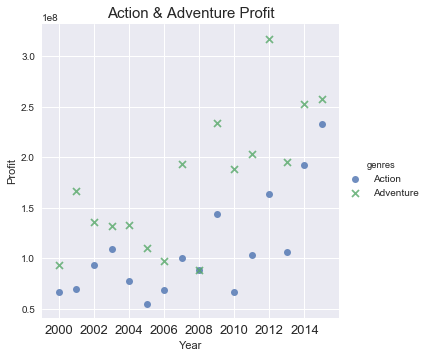

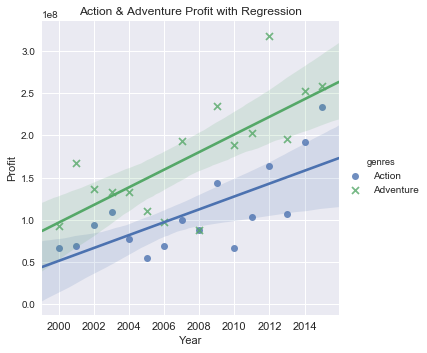

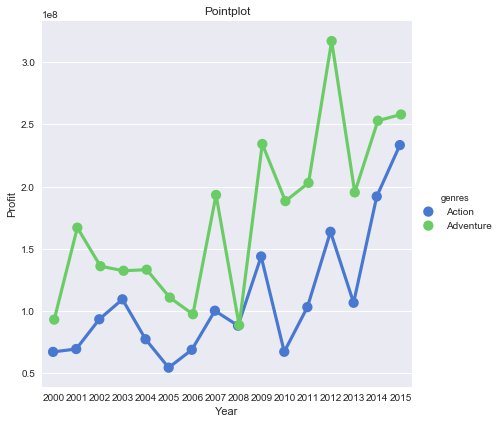

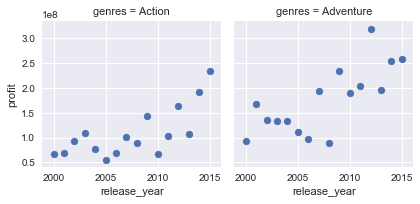

In [273]:
sns.set(style='darkgrid')

a = sns.lmplot(y='profit', x='release_year', hue='genres', data=actAdv, 
               fit_reg=False, scatter_kws={'alpha':0.8}, markers=['o', 'x'])
a.set_ylabels('Profit')
a.set_xlabels('Year')
a.set_xticklabels(ax.get_xticklabels(), fontsize=13)
plt.title('Action & Adventure Profit', fontsize=15)
plt.show()

b = sns.lmplot(y='profit', x='release_year', hue='genres', data=actAdv, 
               fit_reg=True, scatter_kws={'alpha':0.8}, markers=['o', 'x'])
b.set_ylabels('Profit')
b.set_xlabels('Year')
b.set_xticklabels(ax.get_xticklabels(), fontsize=11)
plt.title('Action & Adventure Profit with Regression', fontsize=12)
plt.show()

c = sns.factorplot(x='release_year', y='profit', hue='genres', data=actAdv, 
                  size=6, kind='point', palette='muted', ci=95, dodge=True, join=True)
c.despine(left=True)
c.set_ylabels('Profit')
c.set_xlabels('Year')
plt.title('Pointplot')
plt.show()

d = sns.FacetGrid(actAdv, col='genres')
d.map(plt.scatter,'release_year','profit')
plt.show()